In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings  # Hide all warnings here
warnings.filterwarnings("ignore")
import local
from models.preprocessing import utils
import mne
mne.utils.set_log_level('error')

In [2]:
d = "../../data/reinhartlab/multimodal/"
#d = "G:\\Frederik\\data\\reinhartlab\\multimodal\\"
ext_in = "visual-average.2to90-tfr.h5"
box = utils.select_dataset(d,ext_in); box

In [13]:
tfrs = [mne.time_frequency.read_tfrs(d+c+ext_in) for c in utils.get_selection(box)]
tfr_ga_vis = mne.grand_average([tf for tfr in tfrs for tf in tfr],interpolate_bads=True,drop_bads=True)

In [14]:
ext_in = "audio-average.2to90-tfr.h5"
tfrs = [mne.time_frequency.read_tfrs(d+c+ext_in) for c in utils.get_selection(box)]
tfr_ga_aud = mne.grand_average([tf for tfr in tfrs for tf in tfr],interpolate_bads=True,drop_bads=True)

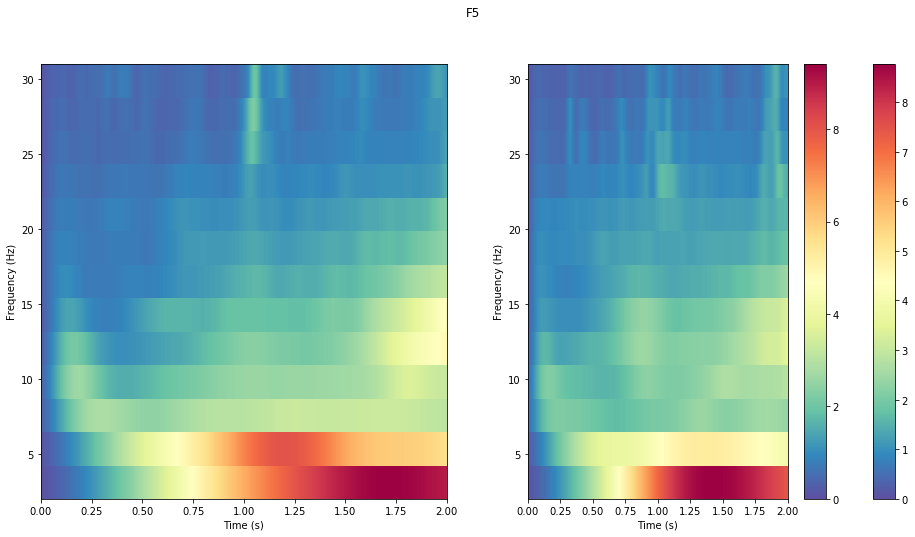

In [18]:
ch = 'F5'
fig,ax=plt.subplots(1,2,figsize=(16,8))
tfr_ga_vis.copy().crop(fmax=30).plot(tmin=0.,picks=ch,baseline=(-.2,0),mode='mean',vmin=0,cmap='Spectral_r',axes=ax[0],show=False);
tfr_ga_aud.copy().crop(fmax=30).plot(tmin=0.,picks=ch,baseline=(-.2,0),mode='mean',vmin=0,cmap='Spectral_r',axes=ax[1],show=False);